In [1]:
# %%
import os
import pickle
from typing import Optional
import warnings
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist


In [17]:
!pwd

/home/nu/ken.shirakawa/projects/python_KS/python/share_analysis/spurious_reconstruction


In [12]:
def find_first_index_above_threshold(arr, threshold):
    """
    配列 arr において、指定された閾値 threshold を超える最初の要素のインデックスを返す。
    閾値を超える要素がない場合は None を返す。
    
    Parameters:
    arr (numpy.ndarray): 検索する配列。
    threshold (float): 閾値。
    
    Returns:
    int or None: 閾値を超える最初の要素のインデックス、または None。
    """
    # 閾値を超える要素のブールインデックスを取得
    above_threshold = arr > threshold
    
    # 閾値を超える最初の要素のインデックスを取得
    indices = np.where(above_threshold)[0]
    
    if indices.size > 0:
        return indices[0]
    else:
        return -1

In [13]:
num_inner_clusters_list = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, #2^10 
                                    #2048, 4096
                                    #4096, 8192, 16384, 32768, 65536, # 2^16
                                    #131072, 262144, 524288
                                    ])
dim_list = [2, 4, 8, 16, 32 , 64 ,128, 256, 512, 1024, 2048, 4096, 8192 ]

dim = 512
inner_intra_ratio_list = [0.01, 0.1, 0.5, 1.0, 5.0, 10, 50, 100]

In [14]:
# load results 
load_dir = './results/cluster_identification_ratio/'#save_dict_10.pkl'
assert os.path.isdir(load_dir)

ratio_list = [0.1, 0.01, 0.5]

ratio = 0.1
with open(os.path.join(load_dir, "cluster_identifiction_change_intra_inter_ratio.pkl"), 'rb') as f:
    res_dict = pickle.load(f)
    
    
cond_dict = {
     "alpha: 10": "cluster_identifiction_change_intra_inter_ratio.pkl",
}

color_dict = {
    "alpha: 10": 0.5,
}


In [19]:
res_dict

{0.01: {'test_classification_accuracy': array([1., 1., 1., 1., 1.], dtype=float32),
  'oos_classification_accuracy': array([0.  , 0.  , 0.66, 1.  , 1.  ], dtype=float32),
  'chance_performances': array([0.03030303, 0.01538462, 0.00775194, 0.00389105, 0.00097561],
        dtype=float32)},
 0.1: {'test_classification_accuracy': array([1., 1., 1., 1., 1.], dtype=float32),
  'oos_classification_accuracy': array([0.  , 0.15, 0.95, 1.  , 1.  ], dtype=float32),
  'chance_performances': array([0.03030303, 0.01538462, 0.00775194, 0.00389105, 0.00097561],
        dtype=float32)},
 0.5: {'test_classification_accuracy': array([1., 1., 1., 1., 1.], dtype=float32),
  'oos_classification_accuracy': array([0.75, 0.92, 1.  , 1.  , 1.  ], dtype=float32),
  'chance_performances': array([0.03030303, 0.01538462, 0.00775194, 0.00389105, 0.00097561],
        dtype=float32)},
 1.0: {'test_classification_accuracy': array([1., 1., 1., 1., 1.], dtype=float32),
  'oos_classification_accuracy': array([0.9 , 0.97, 

0.01
0.1
0.5
1.0
5.0
10
50
100
[0.   0.   0.66 1.   1.  ]


KeyError: 2

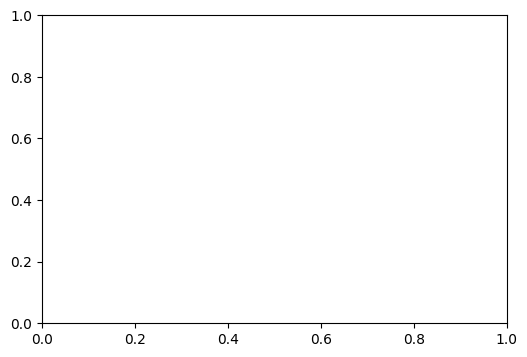

In [20]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
thres = 0.5


for j, (cond_n, cond_f) in enumerate(cond_dict.items()):
    with open(os.path.join(load_dir, cond_f), 'rb') as f:
        res_dict = pickle.load(f)
        
        
    res_array = []
    test_array = []
    for i, dim in enumerate(inner_intra_ratio_list):
        print(dim)
        #print(res_dict[dim]['oos_classification_accuracy'])
        test_array.append(res_dict[dim]['test_classification_accuracy'])
        res_array.append(res_dict[dim]['oos_classification_accuracy'])
        #ax1.plot(num_inner_clusters_list, res_dict[dim]['test_classification_accuracy'], color=cmap(i))

        #ax2.plot(num_inner_clusters_list, res_dict[dim]['oos_classification_accuracy'], label=f'dim {dim}', color=cmap(i))
    res_array = np.array(res_array)
    test_array = np.array(test_array)
    
    
    above_0_list = []
    above_50_list = []
    above_chance_list = []
    for i, arr in enumerate(res_array):
        print(arr)
        dim = dim_list[i]
        chance_performance = res_dict[dim]['chance_performances'][j]

        ind_50 = find_first_index_above_threshold(arr, thres )
        if ind_50 == -1: 
            cluster_50 = 0
        else:
            cluster_50 = num_inner_clusters_list[ind_50]
        above_50_list.append(cluster_50)


        ind_chance = find_first_index_above_threshold(arr, chance_performance)
        if ind_chance == -1: 
            cluster_chance = 0
        else:
            cluster_chance = num_inner_clusters_list[ind_chance]
        above_chance_list.append(cluster_chance)


        ind_0 = find_first_index_above_threshold(arr, 0)
        if ind_0 == -1: 
            cluster_0 = 0
        else:
            cluster_0 = num_inner_clusters_list[ind_0]
        above_0_list.append(cluster_0)

        
    ax.plot(dim_list[:-2], above_50_list[:-2], '-o', color=str(color_dict[cond_n]), label=cond_n)


ax.set_ylim([0, 750])
ax.set_xlabel('Dimension')
ax.set_ylabel('Number of cluster')
sns.despine()
ax.legend()
    
    
#fig.savefig(f'./results/assets/fig09/novel_cluster_identification_compare_thres{thres}.pdf')

#fig.savefig(f'./results/assets/fig09/novel_cluster_identification_compare_thres{thres}.png', dpi=600)

In [10]:
#num_inner_clusters_list, res_dict[dim]['test_classification_accuracy']

with open(os.path.join(load_dir, 'cluster_identifiction_intra_inter_ratio0.1.pkl'), 'rb') as f:
   res_dict = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: './results/cluster_identification_ratio/cluster_identifiction_intra_inter_ratio0.1.pkl'

2


/tmp/ipykernel_28008/2952413909.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20')


KeyError: 2

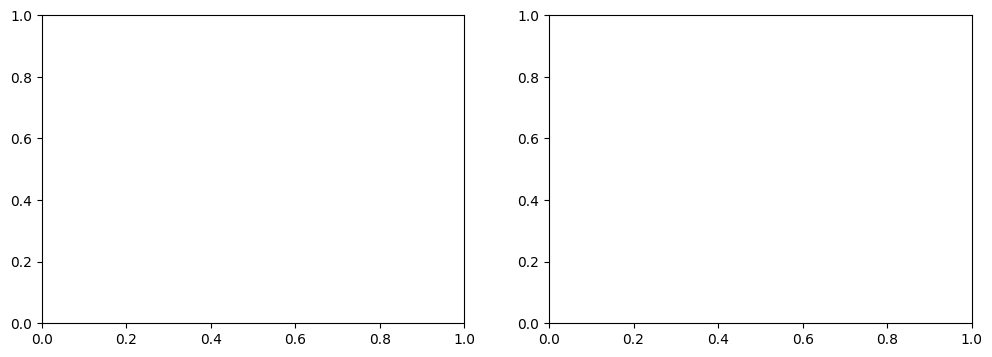

In [11]:
from matplotlib.pyplot import cm
cmap = cm.get_cmap('tab20')
nrow =  len(num_inner_clusters_list) 
ncol = len(dim_list)

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 =    fig.add_subplot(122)
res_array = []
test_array = []
for i, dim in enumerate(dim_list):
    print(dim)
    #print(res_dict[dim]['oos_classification_accuracy'])
    test_array.append(res_dict[dim]['test_classification_accuracy'])
    res_array.append(res_dict[dim]['oos_classification_accuracy'])
    ax1.plot(num_inner_clusters_list, res_dict[dim]['test_classification_accuracy'], color=cmap(i))
    
    ax2.plot(num_inner_clusters_list, res_dict[dim]['oos_classification_accuracy'], label=f'dim {dim}', color=cmap(i))
res_array = np.array(res_array)
test_array = np.array(test_array)

ax1.set_xscale('log')
ax2.set_xscale('log')
#plt.yscale('log')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Cluster identification accuracy')
ax2.set_xlabel('Number of clusters')
#ax2.set_ylabel('Cluster identification accuracy')
#ax.hlines(y=0.5, xmin = num_inner_clusters_list[0], xmax = num_inner_clusters_list[-1], color='black', ls='--')
fig.legend()
sns.despine()
ax1.set_title('Inside cluster identification')
ax2.set_title('Outside cluster identification')

NameError: name 'test_array' is not defined

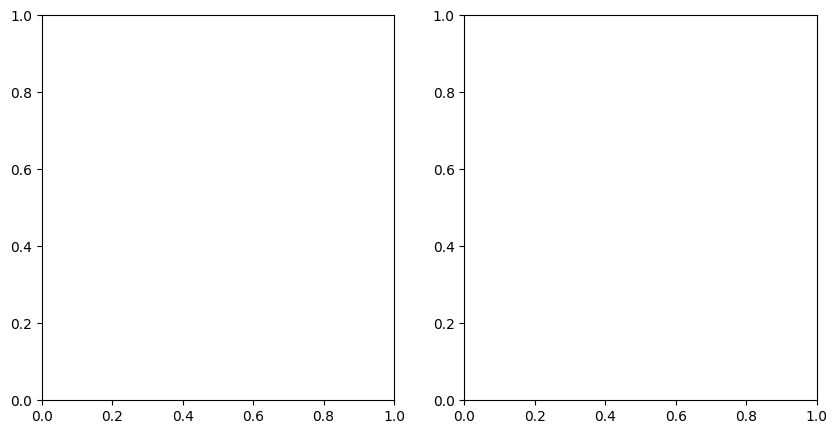

In [8]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
cmap = "rocket" #'gist_heat'
cmap1 = ax1.imshow(test_array, cmap = cmap)
cmap2 = ax2.imshow(res_array, cmap = cmap)

s=4.5


ax1.set_xticks(np.arange(len(num_inner_clusters_list
                           )))
ax1.set_xticklabels(num_inner_clusters_list, rotation=45, ha='right')
ax1.set_xlabel('Number of clusters')

ax1.set_yticks(np.arange(len(dim_list
                           )))
ax1.set_yticklabels(dim_list)
ax1.set_ylabel('Dimension')

ax2.set_xticks(np.arange(len(num_inner_clusters_list
                           )))
ax2.set_xticklabels(num_inner_clusters_list, rotation=45, ha='right')
ax2.set_xlabel('Number of clusters')

ax2.set_yticks(np.arange(len(dim_list
                           )))
ax2.set_yticklabels(dim_list)
ax2.set_ylabel('Dimension')
 # Draw gridlines based on minor ticks
ax1.grid(which='minor', color='gray', linestyle='-', linewidth=0.01)
ax2.grid(which='minor', color='gray', linestyle='-', linewidth=0.01)

# サブプロット間のスペースを調整
#plt.subplots_adjust(wspace=1.5) # wspaceを調整してサブプロット間の間隔を拡大

ax1.set_title('Inside cluster identification')
ax2.set_title('Outside cluster identification')


#fig.colorbar(cmap, cax=ax)
sns.despine()
fig.colorbar(mappable=cmap1, ax=ax1, orientation='vertical')
fig.colorbar(mappable=cmap2, ax=ax2, orientation='vertical')

fig.savefig(f'./results/assets/fig09/cluster_identification_confusion_martrix_finalized.pdf')

fig.savefig('./results/assets/fig09/cluster_identification_confusion_martrix_finalized.png', dpi=600)

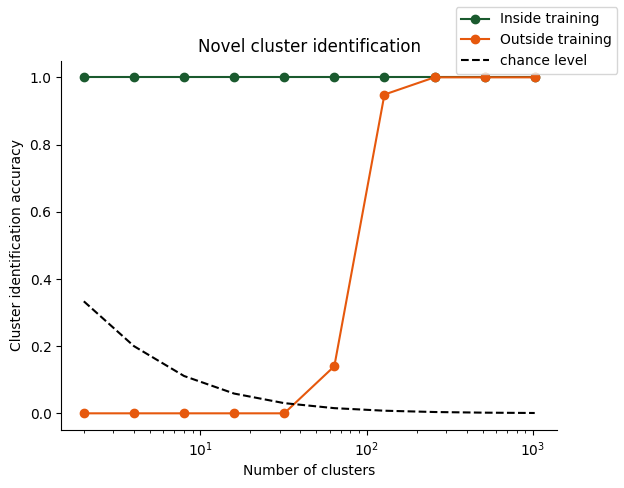

In [30]:
fig, ax = plt.subplots(1,1)
#ax = axes[0]
ax.plot(num_inner_clusters_list,   res_dict[512]['test_classification_accuracy'], 'o-', label='Inside training', color=(26/255, 90/255, 46/255))
ax.plot(num_inner_clusters_list, res_dict[512]['oos_classification_accuracy'], 'o-', label='Outside training',color=(230/255, 88/255, 13/255))

ax.plot(num_inner_clusters_list, res_dict[512]['chance_performances'], '--', label='chance level',color='black')

#ax.vlines(x=64, ymin=0, ymax=1.0, colors='blue', ls='--')
#ax.vlines(x=128, ymin=0, ymax=1.0, colors='orange', ls='--')

ax.set_xscale('log')
#plt.yscale('log')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Cluster identification accuracy')
fig.legend()
sns.despine()
ax.set_title('Novel cluster identification')

#fig.savefig(os.path.join(save_base_dir, f'{analysis_base_condition}.pdf'), bbox_inches='tight')
#fig.savefig(os.path.join(save_base_dir, f'{analysis_base_condition}.png'),dpi=600, bbox_inches='tight')

fig.savefig('./results/assets/fig09/novel_cluster_identification.pdf')

fig.savefig('./results/assets/fig09/novel_cluster_identification.png', dpi=600)

In [38]:
res_dict[512]['oos_classification_accuracy']

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.14013307, 0.94871795, 1.        , 1.        , 1.        ],
      dtype=float32)

In [32]:
num_inner_clusters_list

array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])